I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [32]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [33]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [34]:
training_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_lowmsat/PearceRedMagicXiCosmoFixedNd.hdf5'
#training_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsat.hdf5'
test_file = '/scratch/users/swmclau2/xi_zheng07_cosmo_test_lowmsat//PearceRedMagicXiCosmoFixedNd_Test.hdf5'
#test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoFixedNdLowMsatTest.hdf5'

em_method = 'gp'
split_method = 'random'

In [35]:
a = 1.0
z = 1.0/a - 1.0

In [36]:
fixed_params = {'z':z}#, 'cosmo': 0}#, 'r':24.06822623}

In [37]:
v = np.loadtxt('/home/users/swmclau2/Git/pearce/bin/optimization/sloppy_joes_result.npy')

In [38]:
param_names = ['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff', 'logM0', 'sigma_logM', 'logM1', 'alpha']

In [39]:
pnames = ['bias', 'amp']
pnames.extend(param_names)
pnames.append('amp')
pnames.extend(param_names)

In [40]:
from collections import defaultdict
metric = defaultdict(list)
for val, pname in zip(v, pnames):
    metric[pname].append(val)

In [41]:
from george.kernels import *

In [42]:
np.random.seed(0)
emu = SpicyBuffalo(training_file, method = em_method,hyperparams = {'metric':metric}, fixed_params=fixed_params,
                 custom_mean_function = 'linear', downsample_factor = 0.1)

/home/users/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:287: UserWarning: WARNING: NaN detected. Skipped 21 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [43]:
for pname, val in zip(emu._emulators[0].get_parameter_names(), emu._emulators[0].get_parameter_vector()):
    print pname, val

kernel:k1:k1:log_constant 1.29305147766
kernel:k1:k2:k1:log_constant 2.62133836608
kernel:k1:k2:k2:metric:log_M_0_0 6.94889832944
kernel:k1:k2:k2:metric:log_M_1_1 1.01607774927
kernel:k1:k2:k2:metric:log_M_2_2 5.08172781359
kernel:k1:k2:k2:metric:log_M_3_3 4.74598793593
kernel:k1:k2:k2:metric:log_M_4_4 5.89441920701
kernel:k1:k2:k2:metric:log_M_5_5 3.19114024033
kernel:k1:k2:k2:metric:log_M_6_6 3.6931340623
kernel:k1:k2:k2:metric:log_M_7_7 0.211673591502
kernel:k1:k2:k2:metric:log_M_8_8 6.76853007337
kernel:k1:k2:k2:metric:log_M_9_9 1.62040107202
kernel:k1:k2:k2:metric:log_M_10_10 3.65072859016
kernel:k2:k1:log_constant -0.296509213949
kernel:k2:k2:metric:log_M_0_0 9.32171322959
kernel:k2:k2:metric:log_M_1_1 3.51376161123
kernel:k2:k2:metric:log_M_2_2 3.29787733404
kernel:k2:k2:metric:log_M_3_3 9.50341226968
kernel:k2:k2:metric:log_M_4_4 5.29640994417
kernel:k2:k2:metric:log_M_5_5 8.44108538199
kernel:k2:k2:metric:log_M_6_6 4.82738835806
kernel:k2:k2:metric:log_M_7_7 1.39618562215
kern

In [44]:
emu.scale_bin_centers

array([  0.09581734,   0.13534558,   0.19118072,   0.27004994,
         0.38145568,   0.53882047,   0.76110414,   1.07508818,
         1.51860241,   2.14508292,   3.03001016,   4.28000311,
         6.04566509,   8.53972892,  12.06268772,  17.0389993 ,
        24.06822623,  33.99727318])

In [45]:
rbins = np.logspace(-1.1, 1.6, 19)
print (rbins[1:]+rbins[:-1])/2

[  0.09581733   0.13534558   0.19118072   0.27004994   0.38145568
   0.53882047   0.76110414   1.07508817   1.51860241   2.14508292
   3.03001016   4.28000311   6.04566509   8.53972892  12.06268772
  17.0389993   24.06822623  33.99727318]


In [46]:
params = {}
for pname in emu.get_param_names():
    if pname == 'r':
        continue
    low, high = emu.get_param_bounds(pname)
    params[pname] = np.random.uniform(low, high)
    
print params

{'logM1': 14.267701848157271, 'Neff': 3.6095427706197905, 'logM0': 13.578807613765713, 'sigma_logM': 0.2502193887675708, 'H0': 73.31620420249872, 'w0': -0.5886073500474833, 'omch2': 0.10271736946651576, 'ln10As': 3.0459840518637358, 'alpha': 1.031390598923265, 'ns': 0.9832511796584299, 'ombh2': 0.021913242278466367}


In [47]:
pred_y = emu.emulate_wrt_r(params)[0]
print pred_y

[ 3.91187199  3.64041673  3.34995913  3.02362242  2.6728465   2.32361776
  1.98513767  1.75448582  1.54747576  1.28828111  1.05212245  0.84502892
  0.6263041   0.3836396   0.13080589 -0.12673033 -0.4084252  -0.65191263]


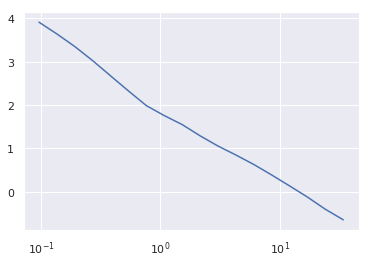

In [48]:
plt.plot(emu.scale_bin_centers, pred_y)
plt.xscale('log')

In [49]:
gof = emu.goodness_of_fit(test_file, statistic = 'frac')
#print gof.mean(), np.median(gof)
for g in gof:
    print g.mean(), np.median(g)

0.104071653318 0.0695197259056
0.092146823119 0.0624149978351
0.0786719232875 0.050923359046
0.0685160595858 0.0438727229035
0.0538178121768 0.0332034510004
0.0446485674692 0.028835138754
0.0376944598899 0.0257202969472
0.0336321885178 0.0234948271667
0.031444421014 0.0227552591946
0.0314887435154 0.0224821255678
0.0345357294253 0.0227089284423
0.0378729804689 0.0187458699568
0.0260234307077 0.0156232573823
0.0232251350212 0.0152814826841
0.0298875634965 0.017976197594
0.0198261969688 0.00942228855488
0.0186267987662 0.012496612919
0.0399761383845 0.0362503738942


In [50]:
emu._save_as_default_metric(metric)

In [54]:
%%bash
cp /home/users/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/default_metrics.pkl /home/users/swmclau2/Git/pearce/emulator/default_metrics.pkl

cp: cannot create regular file ‘/home/users/swmclau2/Git/pearce/emulator/default_metrics.pkl’: No such file or directory


In [ ]:
#print g.mean(), np.median(g)

In [ ]:
pred_y, y = emu.goodness_of_fit(test_file, statistic = None)
#print gof.mean(), np.median(gof)

In [ ]:
plt.hist(y)

In [ ]:
plt.hist(pred_y)

In [ ]:
plt.hist(emu.y)

In [ ]:
plt.hist(np.log10(gof));

In [ ]:
plt.hist(emu.y)

In [ ]:
for i in xrange(50):    
    params = {}

    for pname in emu.get_param_names():
        if pname == 'r':
            continue
        low, high = emu.get_param_bounds(pname)
        params[pname] = np.random.uniform(low, high)
    pred_y = emu.emulate(params)[0]
    print pred_y
    #print params

In [ ]:
for i, (g, r) in enumerate(zip(gof, emu.scale_bin_centers)):
    print r, g.mean(), np.median(g)
    #plt.hist(np.log10(g))
    #plt.show()

In [ ]:
n_cosmo_params = 7
loo_cosmo = emu.x[0, 0,  :n_cosmo_params]

loo_cosmo_idxs = np.all(emu.x[:, :,:n_cosmo_params] == loo_cosmo, axis =2)
train_x, train_y, train_yerr = emu.x[~loo_cosmo_idxs, :], emu.y[ ~loo_cosmo_idxs], emu.yerr[ ~loo_cosmo_idxs]
test_x, test_y, test_yerr = emu.x[loo_cosmo_idxs, :], emu.y[loo_cosmo_idxs], emu.yerr[loo_cosmo_idxs]

In [ ]:
model = emu._emulator
model.compute(train_x, train_yerr)

In [ ]:
pred_y = model.predict(train_y, test_x, False, False, False)*emu._y_std + emu._y_mean


In [ ]:
np.mean(np.abs((pred_y-test_y)/test_y))
#np.mean(np.abs((pred_y-train_y)/train_y))

In [ ]:
        queue_skipper: True
        system: sherlock
        n_jobs: 400
        max_time: 6
resids = np.abs(emu.y*emu._y_std+emu._y_mean - ypred)

In [ ]:
np.mean(resids/(emu.y*emu._y_std+emu._y_mean))

In [ ]:
ypred.mean(), emu._y_mean

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
print test_gof.mean()

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print test_gof.mean()

In [ ]:
plt.hist(np.log10(test_gof));

In [ ]:
test_x

In [ ]:
(emu.x*emu._x_std) + emu._x_mean

In [ ]:
emu.get_param_names()

In [ ]:
test_x_white, test_y_white = (test_x - emu._x_mean)/(emu._x_std + 1e-5), (test_y - emu._y_mean)/(emu._y_std + 1e-5)

In [ ]:
model = emu._emulator

In [ ]:
pred_y_white = model.predict(emu.y, test_x_white, False, False, False)

In [ ]:
pred_y = pred_y_white*emu._y_std + emu._y_mean

In [ ]:
plt.plot(pred_y[:100], label = 'pred')
plt.plot(test_y[:100], label = 'truth')

plt.legend(loc = 'best')

In [ ]:
test_y.mean(), emu._y_mean, pred_y.mean()

In [ ]:
test_y.std(), emu._y_std, pred_y.std()

In [ ]:
plt.hist(pred_y_white, bins = np.linspace(-3, 3, 100), label = 'Pred')
plt.hist(test_y_white, bins = np.linspace(-3, 3, 100), label = 'Test', alpha = 0.4);
plt.legend(loc = 'best')